# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [1]:
m=1
run = 1

1

Choose your grid

In [2]:
global compactified=true
global loggrid=false
global bisection=false
global zeroformat=false
global twod=false#true

global source=false

false

In [3]:
function compactify(r)
    x=r/(1+r)
    return x
end

compactify (generic function with 1 method)

In [4]:
using Quadmath, Printf

res=m;
N=2.0^m*200.0/2.0

if compactified==true
    Xf=1.0
else
    Xf=2.0
end

dx=Xf/N
if loggrid==false
    dt=0.5*round(dx,digits=10)
else
    dt=0.1*round(dx,digits=10)
end
Nt=N
Tf=Nt*dt;

In [5]:
print(N)

200.0

In [6]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA"

# Grid

In [7]:
using Printf
include("./TMYangMillsTHREE.jl");

In [8]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
end;

step size is  0.005
the time step is 0.0025


# Initial data of m β Ψ and Ψ,x

In [40]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initxi=zeros(L)
initderxi=zeros(L)

state_array=[initm initbeta initxi initderxi];

#WBAR,R
#0.088125<A*<0.08875
A=0.0886#0.08865958683658391#0.0884375
r0=0.3
sigma=0.1

initderxi[4:L-3] = init_derpsi(initX1,r0,sigma,A)

state_array[:,4] = initderxi
state_array=ghost(state_array)

####
#XI FROM XI,X

derxi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);

funcs=[derxi_func];

(0.088125+0.08875)/2
there were runs with 0.6 as critical stop that were marked as critical but didnt crash

In [41]:
y0=[0.0 0.0 0.0]

if twod==true
        state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);
    else
        state_array[4:L-3,1:3] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);
end

#state_array = ghost(state_array);

201×3 Matrix{Float64}:
 0.0          0.0          0.0
 3.13486e-11  4.34549e-9   7.40845e-8
 1.09653e-10  9.5867e-9    2.00409e-7
 2.83945e-10  1.77428e-8   4.05677e-7
 6.65978e-10  3.19341e-8   7.28262e-7
 1.48832e-9   5.74981e-8   1.22268e-6
 3.22559e-9   1.04041e-7   1.96562e-6
 6.82843e-9   1.88844e-7   3.06402e-6
 1.41675e-8   3.42743e-7   4.66564e-6
 2.88621e-8   6.20232e-7   6.97292e-6
 5.78e-8      1.11661e-6   1.02609e-5
 1.13881e-7   1.99671e-6   1.49001e-5
 2.20885e-7   3.54243e-6   2.13856e-5
 ⋮                        
 0.105351     0.41337     -9.13263e-12
 0.105351     0.41337     -9.13263e-12
 0.105351     0.41337     -9.13263e-12
 0.105351     0.41337     -9.13263e-12
 0.105351     0.41337     -9.13263e-12
 0.105351     0.41337     -9.13263e-12
 0.105351     0.41337     -9.13263e-12
 0.105351     0.41337     -9.13263e-12
 0.105351     0.41337     -9.13263e-12
 0.105351     0.41337     -9.13263e-12
 0.105351     0.41337     -9.13263e-12
 0.105351     0.41337     -9.13263

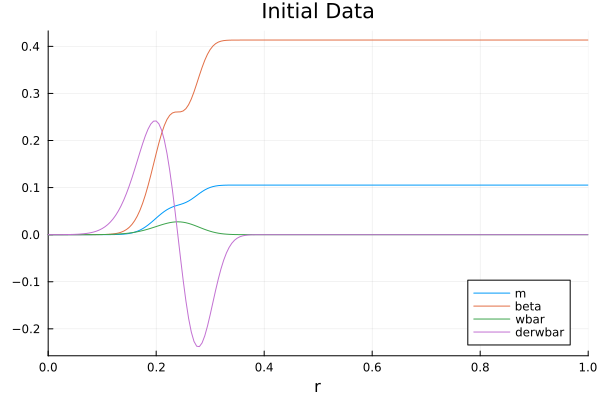

In [42]:
using Plots #showing initial data and the initial status of the horizon finder
plot((initX[4:L-3]), state_array[4:L-3,1:4], xaxis="r",title="Initial Data", labels=["m" "beta" "wbar" "derwbar"],xlim=[0,1])

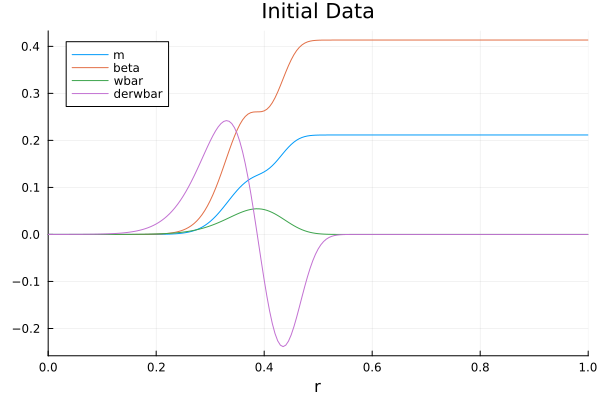

In [39]:
using Plots #showing initial data and the initial status of the horizon finder
plot((initX[4:L-3]), state_array[4:L-3,1:4], xaxis="r",title="Initial Data", labels=["m" "beta" "wbar" "derwbar"],xlim=[0,1])

In [212]:
function compactify(r)
    return r/(1+r)
end
function uncompactify(x)
    return x/(1-x)
end;

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [213]:
using CSV, Tables
#CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "xi", "derxi", "derderxi"]

derderxi=Der_arrayLOP(state_array,4,initX) .* (initX .- 1) .^ 2
print_muninn(files, 0, [state_array[:,1:4] derderxi],res,"w", initX)

In [214]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

In [215]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

0.4005004691532729


In [216]:
using Base.Threads
Threads.nthreads()

4

In [217]:
monitor_ratio[5:L-4] = 2 .* state_array[5:L-4,1] ./ initX[5:L-4] .* (1 .- initX[5:L-4]);
maximum(monitor_ratio)

0.0063390598082592835

In [218]:
dt=0.002/2^(m-1)

0.00025

 ## Time evolution

fixed grid

In [219]:
finaltime=1.5
evol_stats, T_interp = timeevolution(state_array,finaltime,run);
#CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 500 dt is 0.00025, t=0.12500000000000008 speed is 0.4993751953069176, dx/dt=2.5


iteration 1000 dt is 0.00025, t=0.25000000000000017 speed is 0.49937519467850966, dx/dt=2.5


iteration 1500 dt is 0.00025, t=0.3749999999999864 speed is 0.4993751882240948, dx/dt=2.5


iteration 2000 dt is 0.00025, t=0.49999999999997263 speed is 0.49937519422230053, dx/dt=2.5


iteration 2500 dt is 0.00025, t=0.6249999999999589 speed is 0.49937518099760775, dx/dt=2.5


iteration 3000 dt is 0.00025, t=0.7499999999999452 speed is 0.4993751930198124, dx/dt=2.5


iteration 3500 dt is 0.00025, t=0.8749999999999314 speed is 0.4993751937186907, dx/dt=2.5


iteration 4000 dt is 0.00025, t=0.9999999999999176 speed is 0.49937519496775684, dx/dt=2.5


iteration 4500 dt is 0.00025, t=1.1249999999999594 speed is 0.4993751953074305, dx/dt=2.5


iteration 5000 dt is 0.00025, t=1.250000000000001 speed is 0.4993751953124922, dx/dt=2.5


iteration 5500 dt is 0.00025, t=1.3750000000000429 speed is 0.49937519531